In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
def isNaN(string):
    return string!=string

In [3]:
!pwd

/Users/trevormccaffrey/Desktop/git/VLA2022


In [4]:
dat = pd.read_csv("VLA2018data/grdr7_Shen2011_8403col_lofar_first_vlass_nvssFF_info.csv")
z   = dat["REDSHIFT"].values ; zmask = ((z>1.65)&(z<1.75))
dat = dat[zmask]

In [5]:
dat.shape

(2216, 43)

In [6]:
dat

col1                     Name        RA_1      Dec_1  \
2     2971  SDSSJ125929.93+560525.7  194.874718  56.090499   
3     2972  SDSSJ125905.73+562424.3  194.773916  56.406775   
4     2973  SDSSJ131458.40+560342.5  198.743352  56.061806   
16    2989  SDSSJ140333.12+534232.0  210.888020  53.708896   
24    2210  SDSSJ110643.99+494152.0  166.683321  49.697778   
...    ...                      ...         ...        ...   
8391  2863  SDSSJ141010.14+462949.2  212.542279  46.497024   
8392  2864  SDSSJ140430.21+454436.0  211.125887  45.743341   
8394  2865  SDSSJ140714.34+465659.0  211.809786  46.949742   
8395  2866  SDSSJ142123.06+464547.9  215.346123  46.763326   
8396  1850  SDSSJ123530.55+522827.7  188.877298  52.474373   

               SDSS_NAME        RA_2      DEC_2  REDSHIFT  TARGET_FLAG_TARGET  \
2     125929.93+560525.7  194.874725  56.090500    1.6754                 3.0   
3     125905.73+562424.3  194.773911  56.406776    1.6719           1048579.0   
4     131458.40+560342.5  198.743347  56.061806    1.7493           3145739.0   
16    140333.12+534232.0  210.888016  53.708897    1.6708           1048578.0   
24    110643.99+494152.0  166.683319  49.697777    1.6697                 2.0   
...                  ...         ...        ...       ...                 ...   
8391  141010.14+462949.2  212.542282  46.497025    1.6852           1048579.0   
8392  140430.21+454436.0  211.125885  45.743340    1.6784           1048578.0   
8394  140714.34+465659.0  211.809784  46.949741    1.7199                 2.0   
8395  142123.06+464547.9  215.346130  46.763325    1.6694           3145738.0   
8396  123530.55+522827.7  188.877304  52.474373    1.6507                11.0   

      UNIFORM_TARGET  ...     DEC2000x  NVSSblank (Jy/beam)    RA2000_2  \
2                1.0  ...  +57:05:25.8                  NaN         NaN   
3                1.0  ...  +57:24:24.4                  NaN         NaN   
4                1.0  ...  +57:03:42.5                  NaN         NaN   
16               1.0  ...  +54:42:32.0                  NaN         NaN   
24               1.0  ...  +50:41:52.0                  NaN         NaN   
...              ...  ...          ...                  ...         ...   
8391             1.0  ...  +47:29:49.3                  NaN         NaN   
8392             1.0  ...  +46:44:36.0                  NaN         NaN   
8394             1.0  ...  +47:56:59.1                  NaN         NaN   
8395             1.0  ...  +47:45:48.0                  NaN         NaN   
8396             1.0  ...  +53:28:27.7             -0.00009  188.877292   

      DEC2000_2  Separation_1c   r_z  Separation_1d   Peak_flux  E_Peak_flux  \
2           NaN            NaN  DR7Q       0.015080         NaN          NaN   
3           NaN            NaN  DR7Q       0.012061         NaN          NaN   
4           NaN            NaN  DR7Q       0.009762  654.252554     0.575323   
16          NaN            NaN    VI       0.009348    1.267676     0.092448   
24          NaN            NaN    VI       0.006211         NaN          NaN   
...         ...            ...   ...            ...         ...          ...   
8391        NaN            NaN  DR7Q       0.007932         NaN          NaN   
8392        NaN            NaN  DR7Q       0.007258         NaN          NaN   
8394        NaN            NaN  DR7Q       0.005567         NaN          NaN   
8395        NaN            NaN  DR7Q       0.018737   33.494703     0.138010   
8396  53.474361         0.0428    VI       0.013335         NaN          NaN   

      Separation  
2       0.015080  
3       0.012061  
4       0.009762  
16      0.009348  
24      0.006211  
...          ...  
8391    0.007932  
8392    0.007258  
8394    0.005567  
8395    0.018737  
8396    0.013335  

[2216 rows x 43 columns]

In [7]:
dat.columns

Index(['col1', 'Name', 'RA_1', 'Dec_1', 'SDSS_NAME', 'RA_2', 'DEC_2',
       'REDSHIFT', 'TARGET_FLAG_TARGET', 'UNIFORM_TARGET', 'COL_FLAG', 'MI_Z2',
       'BAL_FLAG', 'FIRST_FR_TYPE', 'FINT_REST6CM_MJY_OBS',
       'LOGFNU2500A_ERGS_OBS', 'R_6CM_2500A', 'LOGL3000', 'LOGL1350',
       'Separation_1', 'RA', 'Dec', 'z_paul', 'CIV_blue', 'CIV_EW',
       'CIV_Distance', 'Separation_1a', 'NVSSff (Jy/beam', 'RA2000_1',
       'DEC2000_1', 'Separation_1b', 'Dec+1', 'RA2000x', 'DEC2000x',
       'NVSSblank (Jy/beam)', 'RA2000_2', 'DEC2000_2', 'Separation_1c', 'r_z',
       'Separation_1d', 'Peak_flux', 'E_Peak_flux', 'Separation'],
      dtype='object')

In [8]:
ra = dat["RA_1"].values
dec= dat["Dec_1"].values
blue = dat["CIV_blue"].values
ew = dat["CIV_EW"].values

lofar    = ~isNaN(dat["r_z"].values) 
lofar_det= ~isNaN(dat["Peak_flux"].values)
first    = dat["FINT_REST6CM_MJY_OBS"].values > 0
#vlass    = ~isNaN(dat["Total_flux"].values)

In [9]:
print("LOFAR footprint : %d" % lofar.sum())
print("LOFAR detections: %d" % lofar_det.sum())
print("FIRST detections: %d" % first.sum())
#print("VLASS detections: %d" % vlass.sum())

LOFAR footprint : 102
LOFAR detections: 34
FIRST detections: 165


In [10]:
RA_deg = coord.Angle(ra, unit=u.degree).degree
DEC_deg = coord.Angle(dec, unit=u.degree).degree

In [11]:
coords = SkyCoord(RA_deg, DEC_deg, unit=u.degree)

In [12]:
coords.ra.radian

array([3.40120546, 3.39944613, 3.46872586, ..., 3.69677815, 3.75849888,
       3.29653073])

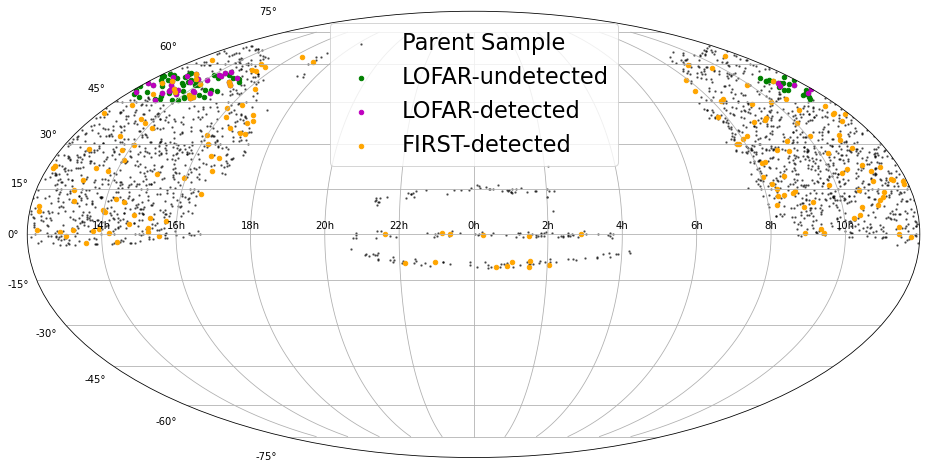

In [13]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, c="k", s=2, alpha=0.5, label="Parent Sample")
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[lofar], coords.dec.radian[lofar], c="g", s=20, label="LOFAR-undetected")
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[lofar_det], coords.dec.radian[lofar_det], c="m", s=20, label="LOFAR-detected")
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[first], coords.dec.radian[first], c="orange", s=20, label="FIRST-detected")
#ax.scatter(coords.ra.wrap_at(180*u.degree).radian[vlass], coords.dec.radian[vlass], c="b", s=20)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
plt.grid(True)
plt.legend(loc="upper center", prop={"size":22.5})
plt.tight_layout()
plt.savefig("CIVradec.pdf")

Want a long strip of RA to get volume-complete sample. See how many are in cuts of 2 degrees.

In [14]:
ra, dec

(array([194.874718, 194.773916, 198.743352, ..., 211.809786, 215.346123,
        188.877298]),
 array([56.090499, 56.406775, 56.061806, ..., 46.949742, 46.763326,
        52.474373]))

In [15]:
dec.min(), dec.max()

(-11.138894, 68.339545)

(array([ 58.,  20., 165., 128., 131., 159., 183., 147., 141., 186., 142.,
        132., 130., 100.,  89.,  73.,  80.,  67.,  53.,  32.]),
 array([-11.138894  ,  -7.16497205,  -3.1910501 ,   0.78287185,
          4.7567938 ,   8.73071575,  12.7046377 ,  16.67855965,
         20.6524816 ,  24.62640355,  28.6003255 ,  32.57424745,
         36.5481694 ,  40.52209135,  44.4960133 ,  48.46993525,
         52.4438572 ,  56.41777915,  60.3917011 ,  64.36562305,
         68.339545  ]),
 <BarContainer object of 20 artists>)

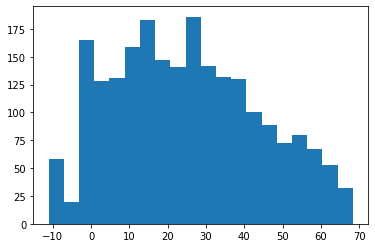

In [16]:
plt.hist(dec, bins=20)

In [17]:
dphi = 2.5
for i in np.arange(-17, 70, dphi):
    dmask = ((dec>i) & (dec<(i+dphi)))
    print("%3d < Dec < %3d: %4d, %3d LoTSS sources, %3d radio-detected, %f < dec < %f" % (i, i+dphi, dmask.sum(), lofar[dmask].sum(), (lofar_det|first)[dmask].sum(), i, i+dphi))

-17 < Dec < -14:    0,   0 LoTSS sources,   0 radio-detected, -17.000000 < dec < -14.500000
-14 < Dec < -12:    0,   0 LoTSS sources,   0 radio-detected, -14.500000 < dec < -12.000000
-12 < Dec <  -9:   23,   0 LoTSS sources,   4 radio-detected, -12.000000 < dec < -9.500000
 -9 < Dec <  -7:   36,   0 LoTSS sources,   4 radio-detected, -9.500000 < dec < -7.000000
 -7 < Dec <  -4:   13,   0 LoTSS sources,   0 radio-detected, -7.000000 < dec < -4.500000
 -4 < Dec <  -2:   28,   0 LoTSS sources,   2 radio-detected, -4.500000 < dec < -2.000000
 -2 < Dec <   0:  131,   0 LoTSS sources,  11 radio-detected, -2.000000 < dec < 0.500000
  0 < Dec <   3:   88,   0 LoTSS sources,  11 radio-detected, 0.500000 < dec < 3.000000
  3 < Dec <   5:   81,   0 LoTSS sources,   4 radio-detected, 3.000000 < dec < 5.500000
  5 < Dec <   8:   83,   0 LoTSS sources,   4 radio-detected, 5.500000 < dec < 8.000000
  8 < Dec <  10:   74,   0 LoTSS sources,   6 radio-detected, 8.000000 < dec < 10.500000
 10 < Dec <  

3.5 deg2 gives 17/61 radio --> 44 observations needed

2.5 deg2 gives 15/51 radio --> 36 observations needed.  Not great, but might be the best we can hope for.  Each observation eats up 2 hours of time, and $\sim75$ total for 51 sources with justification "we will determine the complete luminosity function" just doesn't sound convincing to me.  We can add them to the 50 sources we already have, but the whole point of this proposal is that we're nearly volume-limited by our position in the sky; adding 50 spread all throughout the sky takes away that homogeneity.

Let's go with $ 48 < \delta < 53$.  That gives us a statistically meaningful volume-limited sample with size N=93, 48 of which are in the LoTSS-DR1 footprint.  27 are also detected in the radio, so for those we can make sure we're not wasting any observing time. 

In [29]:
decmask = ((dec>48)&(dec<50.5))
sample  = dat[decmask]

In [30]:
sample

col1                     Name        RA_1      Dec_1  \
24    2210  SDSSJ110643.99+494152.0  166.683321  49.697778   
38    2215  SDSSJ112934.85+481147.3  172.395245  48.196486   
46    2220  SDSSJ113653.01+482812.8  174.220914  48.470234   
56    3012  SDSSJ145844.83+492439.7  224.686796  49.411041   
57    2226  SDSSJ115729.71+495940.3  179.373821  49.994545   
58    2228  SDSSJ120554.84+494236.3  181.478533  49.710092   
68    8518  SDSSJ134844.91+491330.8  207.187146  49.225224   
609    363  SDSSJ082233.63+501712.3  125.640133  50.286753   
618    373  SDSSJ082846.01+490938.4  127.191729  49.160675   
981   3925  SDSSJ140952.13+490901.9  212.467213  49.150541   
1044   830  SDSSJ083649.56+484154.1  129.206525  48.698365   
1251  3935  SDSSJ141556.63+484429.4  213.985960  48.741509   
1395  1133  SDSSJ162732.88+482836.9  246.887006  48.476922   
1742  1502  SDSSJ090304.61+480336.5  135.769239  48.060148   
1744  1504  SDSSJ091003.60+501320.1  137.515027  50.222259   
1850  1614  SDSSJ155402.58+482951.0  238.510773  48.497523   
1851  1615  SDSSJ155237.65+481135.0  238.156895  48.193071   
1852  1616  SDSSJ154810.92+482528.1  237.045528  48.424483   
1856  1620  SDSSJ155330.43+501227.0  238.376833  50.207527   
2080  1824  SDSSJ103833.10+484152.3  159.637945  48.697875   
2083  1826  SDSSJ103426.81+502101.7  158.611742  50.350483   
2147  1927  SDSSJ091728.50+483203.1  139.368791  48.534199   
2504  2346  SDSSJ095047.48+480047.3  147.697835  48.013155   
2512  2353  SDSSJ095744.73+491823.3  149.436399  49.306498   
2525  2366  SDSSJ100823.41+494747.5  152.097558  49.796534   
2545  2445  SDSSJ141912.62+501025.4  214.802606  50.173730   
2610  2551  SDSSJ152957.18+495116.4  232.488269  49.854562   
2611  2552  SDSSJ152544.08+492551.2  231.433679  49.430906   
2615  2558  SDSSJ153745.03+481502.9  234.437634  48.250815   
2617  2560  SDSSJ153548.42+494818.7  233.951751  49.805214   
2766  2452  SDSSJ143154.32+494411.3  217.976340  49.736488   
2833  2454  SDSSJ144913.21+483715.7  222.305062  48.621051   
2868  2457  SDSSJ144549.72+493120.2  221.457186  49.522302   
3389  3498  SDSSJ125503.87+480952.9  193.766161  48.164696   
4558  4808  SDSSJ074729.63+492022.7  116.873492  49.339646   
5278  2223  SDSSJ114305.93+493542.7  175.774725  49.595208   
5723  2230  SDSSJ121420.28+484743.5  183.584513  48.795432   
7132  7468  SDSSJ161601.73+495634.4  244.007218  49.942899   
7529  7942  SDSSJ081602.19+492502.3  124.009164  49.417323   
7691  3469  SDSSJ121436.43+481426.5  183.651833  48.240721   
7834  8278  SDSSJ102111.01+491330.3  155.295909  49.225094   
8318  1501  SDSSJ085952.29+485046.7  134.967902  48.846330   
8345  8236  SDSSJ105636.40+493156.4  164.151671  49.532350   
8348  2836  SDSSJ123612.46+485442.8  189.051924  48.911902   
8363  2844  SDSSJ131028.13+482204.9  197.617234  48.368032   
8364  2845  SDSSJ131624.27+494522.9  199.101148  49.756367   
8368  2848  SDSSJ132442.70+483400.5  201.177932  48.566816   
8370  2850  SDSSJ131922.17+490723.2  199.842388  49.123138   
8373  2851  SDSSJ132250.60+500334.7  200.710834  50.059645   
8377  2854  SDSSJ133406.53+494235.7  203.527220  49.709936   
8381  2856  SDSSJ133420.86+485254.9  203.586922  48.881938   

               SDSS_NAME        RA_2      DEC_2  REDSHIFT  TARGET_FLAG_TARGET  \
24    110643.99+494152.0  166.683319  49.697777    1.6697                 2.0   
38    112934.85+481147.3  172.395248  48.196487    1.6810           1048579.0   
46    113653.01+482812.8  174.220917  48.470234    1.6549                 3.0   
56    145844.83+492439.7  224.686798  49.411041    1.7134           1048579.0   
57    115729.71+495940.3  179.373825  49.994545    1.7004                 2.0   
58    120554.84+494236.3  181.478531  49.710091    1.6660           1048578.0   
68    134844.91+491330.8  207.187149  49.225224    1.6518                 3.0   
609   082233.63+501712.3  125.640137  50.286755    1.7349           1048580.0   
618   082846.01+490938.4  127.191727  49.160675    1

In [31]:
sample.to_csv("proposals/RLF/McCaffrey2022B_finalsample.csv")

4 of these are from the original Richards+21 VLA sample:
- 081656.84+492438.1, 26uJy upper limit
- 095648.48+534713.5, 36uJy upper limit
- 101946.98+494848.6, ~2.5mJy FIRST source (should still ask for time to get 3GHz)
- 144510.01+524538.7, 55uJy detection in 2018b

So that leaves 92 sources we need to ask time for.  Collect the radio data we have and see how much time that'd add up to.

In [32]:
lofar    = ~isNaN(sample["r_z"].values) 
lofar_det= ~isNaN(sample["Peak_flux"].values)
first    = sample["FINT_REST6CM_MJY_OBS"].values > 0
#vlass    = ~isNaN(sample["Total_flux"].values)

In [33]:
#all in uJy
flux_lofar = sample["Peak_flux"].values
flux_first = sample["FINT_REST6CM_MJY_OBS"].values
#flux_vlass = sample["Total_flux"].values

In [34]:
print("LoTSS footprint : %d" % lofar.sum())
print("LoTSS detections: %d(%d)" % (lofar_det.sum(), ((lofar_det)&(~first)).sum()))
print("FIRST detections: %d(%d)" % (first.sum(), ((~lofar_det)&(first)).sum()))
#print("VLASS detections: %d(%d)" % (vlass.sum(), ((~lofar_det)&(~first)&(vlass)).sum()))

LoTSS footprint : 24
LoTSS detections: 11(10)
FIRST detections: 5(4)


In [37]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(16,4.5))
ax1.hist(sample["Peak_flux"].values)
ax2.hist(sample["FINT_REST6CM_MJY_OBS"].values[first])
#ax3.hist(sample["Total_flux"].values)

(array([2., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 11.85301084,  35.05629028,  58.25956972,  81.46284916,
        104.66612861, 127.86940805, 151.07268749, 174.27596693,
        197.47924637, 220.68252581, 243.88580525]),
 <BarContainer object of 10 artists>)

all flux densities in mJy

In [38]:
src_times = np.zeros(sample.shape[0])

In [41]:
sample["Peak_flux"].values[lofar_det].sort()

These are some rough cutoffs we can use in determining observing times:

- 9uJy requires a total of ~24min
- 10uJy requires a total of ~20min
- 12uJy requires a total of ~13min
- 15uJy requires a total of ~8min
- 20uJy requires a total of ~4.5min
- 40uJy requires a total of ~1min

In [58]:
def flux3ghz(nu, f):
    #convert f at nu to f at 3GHz assuming alpha=-0.7
    return f*((3/nu)**(-0.7))

def obs_time(flux):
    #flux units in uJy
    if flux/5 > 40:
        return 1
    elif flux/5 > 20:
        return 4.5
    elif flux/5 > 15:
        return 8
    elif flux/5 > 12:
        return 13
    elif flux/5 > 10:
        return 20
    elif flux/5 > 9:
        return 24
    elif flux/5 > 8:
        return 30
    return 0

1e3*flux3ghz(.144, 0.4)

47.74510551913738

In [62]:
for i in range(sample.shape[0]):
    #if vlass[i]:
    #    f3i = 1e3*1.12*flux_vlass[i] #vlass1.1/2 flux systematically low by 15/8%
    #    src_times[i] = obs_time(f3i)
    #    #detected in vlass, apply flux correction and assign observing time
    if first[i]:
        f3i = 1e3*flux3ghz(1.4, flux_first[i])
        src_times[i] = obs_time(f3i)
        #detected in first, compute 3GHz flux assuming alpha=-0.7 and assign observing time
    elif lofar_det[i]:
        f3i = 1e3*flux3ghz(.144, flux_lofar[i])
        src_times[i] = obs_time(f3i)
        #detected in lofar, compute 3GHz flux assuming alpha=-0.7 and assign observing time

In [63]:
src_times.sum() / 60

2.1666666666666665

In [64]:
(src_times==0).sum()

36

In [65]:
src_times

array([ 0. ,  0. ,  4.5,  0. ,  4.5,  0. ,  0. ,  0. ,  0. , 20. ,  0. ,
        4.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 13. ,  0. ,
        1. ,  1. ,  0. ,  4.5,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        1. , 30. ,  0. , 30. ,  1. , 13. ,  1. ])

In [66]:
#For all other sources, we want to go down to 5.8uJy
src_times[(src_times==0)] = 65
src_times

array([65. , 65. ,  4.5, 65. ,  4.5, 65. , 65. , 65. , 65. , 20. , 65. ,
        4.5, 65. , 65. , 65. , 65. , 65. , 65. , 65. , 65. , 65. , 65. ,
       65. , 65. , 65. , 65. , 65. , 65. , 65. , 65. , 65. , 13. , 65. ,
        1. ,  1. , 65. ,  4.5,  1. , 65. , 65. , 65. , 65. , 65. , 65. ,
        1. , 30. , 65. , 30. ,  1. , 13. ,  1. ])

In [88]:
(src_times==1).sum(), (src_times==4.5).sum(), (src_times==8).sum(), (src_times==13).sum(), (src_times==20).sum(), (src_times==24).sum(), (src_times==30).sum()

(6, 4, 0, 2, 1, 0, 2)

In [67]:
sample["Integration Time (min)"] = src_times

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
sample

col1                     Name        RA_1      Dec_1  \
24    2210  SDSSJ110643.99+494152.0  166.683321  49.697778   
38    2215  SDSSJ112934.85+481147.3  172.395245  48.196486   
46    2220  SDSSJ113653.01+482812.8  174.220914  48.470234   
56    3012  SDSSJ145844.83+492439.7  224.686796  49.411041   
57    2226  SDSSJ115729.71+495940.3  179.373821  49.994545   
58    2228  SDSSJ120554.84+494236.3  181.478533  49.710092   
68    8518  SDSSJ134844.91+491330.8  207.187146  49.225224   
609    363  SDSSJ082233.63+501712.3  125.640133  50.286753   
618    373  SDSSJ082846.01+490938.4  127.191729  49.160675   
981   3925  SDSSJ140952.13+490901.9  212.467213  49.150541   
1044   830  SDSSJ083649.56+484154.1  129.206525  48.698365   
1251  3935  SDSSJ141556.63+484429.4  213.985960  48.741509   
1395  1133  SDSSJ162732.88+482836.9  246.887006  48.476922   
1742  1502  SDSSJ090304.61+480336.5  135.769239  48.060148   
1744  1504  SDSSJ091003.60+501320.1  137.515027  50.222259   
1850  1614  SDSSJ155402.58+482951.0  238.510773  48.497523   
1851  1615  SDSSJ155237.65+481135.0  238.156895  48.193071   
1852  1616  SDSSJ154810.92+482528.1  237.045528  48.424483   
1856  1620  SDSSJ155330.43+501227.0  238.376833  50.207527   
2080  1824  SDSSJ103833.10+484152.3  159.637945  48.697875   
2083  1826  SDSSJ103426.81+502101.7  158.611742  50.350483   
2147  1927  SDSSJ091728.50+483203.1  139.368791  48.534199   
2504  2346  SDSSJ095047.48+480047.3  147.697835  48.013155   
2512  2353  SDSSJ095744.73+491823.3  149.436399  49.306498   
2525  2366  SDSSJ100823.41+494747.5  152.097558  49.796534   
2545  2445  SDSSJ141912.62+501025.4  214.802606  50.173730   
2610  2551  SDSSJ152957.18+495116.4  232.488269  49.854562   
2611  2552  SDSSJ152544.08+492551.2  231.433679  49.430906   
2615  2558  SDSSJ153745.03+481502.9  234.437634  48.250815   
2617  2560  SDSSJ153548.42+494818.7  233.951751  49.805214   
2766  2452  SDSSJ143154.32+494411.3  217.976340  49.736488   
2833  2454  SDSSJ144913.21+483715.7  222.305062  48.621051   
2868  2457  SDSSJ144549.72+493120.2  221.457186  49.522302   
3389  3498  SDSSJ125503.87+480952.9  193.766161  48.164696   
4558  4808  SDSSJ074729.63+492022.7  116.873492  49.339646   
5278  2223  SDSSJ114305.93+493542.7  175.774725  49.595208   
5723  2230  SDSSJ121420.28+484743.5  183.584513  48.795432   
7132  7468  SDSSJ161601.73+495634.4  244.007218  49.942899   
7529  7942  SDSSJ081602.19+492502.3  124.009164  49.417323   
7691  3469  SDSSJ121436.43+481426.5  183.651833  48.240721   
7834  8278  SDSSJ102111.01+491330.3  155.295909  49.225094   
8318  1501  SDSSJ085952.29+485046.7  134.967902  48.846330   
8345  8236  SDSSJ105636.40+493156.4  164.151671  49.532350   
8348  2836  SDSSJ123612.46+485442.8  189.051924  48.911902   
8363  2844  SDSSJ131028.13+482204.9  197.617234  48.368032   
8364  2845  SDSSJ131624.27+494522.9  199.101148  49.756367   
8368  2848  SDSSJ132442.70+483400.5  201.177932  48.566816   
8370  2850  SDSSJ131922.17+490723.2  199.842388  49.123138   
8373  2851  SDSSJ132250.60+500334.7  200.710834  50.059645   
8377  2854  SDSSJ133406.53+494235.7  203.527220  49.709936   
8381  2856  SDSSJ133420.86+485254.9  203.586922  48.881938   

               SDSS_NAME        RA_2      DEC_2  REDSHIFT  TARGET_FLAG_TARGET  \
24    110643.99+494152.0  166.683319  49.697777    1.6697                 2.0   
38    112934.85+481147.3  172.395248  48.196487    1.6810           1048579.0   
46    113653.01+482812.8  174.220917  48.470234    1.6549                 3.0   
56    145844.83+492439.7  224.686798  49.411041    1.7134           1048579.0   
57    115729.71+495940.3  179.373825  49.994545    1.7004                 2.0   
58    120554.84+494236.3  181.478531  49.710091    1.6660           1048578.0   
68    134844.91+491330.8  207.187149  49.225224    1.6518                 3.0   
609   082233.63+501712.3  125.640137  50.286755    1.7349           1048580.0   
618   082846.01+490938.4  127.191727  49.160675    1

In [69]:
sample.to_csv("proposals/RLF/McCaffrey2022B_finalsample.csv")

In [75]:
sdss_name[0]

'110643.99+494152.0'

In [82]:
def format_sdss(name, ax):
    if ax=="RA":
        return "%s:%s:%s"%(name[:2],name[2:4],name[4:9])
    elif ax=="Dec":
        return "%s:%s:%s"%(name[9:12],name[12:14],name[14:])
    return 0

names = sample["Name"].values
sdss_name = sample["SDSS_NAME"].values #format 000000.00+000000.0
z = sample["REDSHIFT"].values
times = sample["Integration Time (min)"].values

for i in range(sample.shape[0]):
    if times[i]<30:
        print("%s; LoTSS/FIRST bright; Equatorial; J2000; %s; %s; LSRK; Redshift; %.4f; N;" % (names[i][:13], format_sdss(sdss_name[i], "RA"), format_sdss(sdss_name[i], "Dec"), z[i]))
    elif times[i]<60:
        print("%s; LoTSS/FIRST faint; Equatorial; J2000; %s; %s; LSRK; Redshift; %.4f; N;" % (names[i][:13], format_sdss(sdss_name[i], "RA"), format_sdss(sdss_name[i], "Dec"), z[i]))
    else:   
        print("%s; %s; Equatorial; J2000; %s; %s; LSRK; Redshift; %.4f; N;" % (names[i][:13], names[i], format_sdss(sdss_name[i], "RA"), format_sdss(sdss_name[i], "Dec"), z[i]))

SDSSJ110643.9; SDSSJ110643.99+494152.0; Equatorial; J2000; 11:06:43.99; +49:41:52.0; LSRK; Redshift; 1.6697; N;
SDSSJ112934.8; SDSSJ112934.85+481147.3; Equatorial; J2000; 11:29:34.85; +48:11:47.3; LSRK; Redshift; 1.6810; N;
SDSSJ113653.0; LoTSS/FIRST bright; Equatorial; J2000; 11:36:53.01; +48:28:12.8; LSRK; Redshift; 1.6549; N;
SDSSJ145844.8; SDSSJ145844.83+492439.7; Equatorial; J2000; 14:58:44.83; +49:24:39.7; LSRK; Redshift; 1.7134; N;
SDSSJ115729.7; LoTSS/FIRST bright; Equatorial; J2000; 11:57:29.71; +49:59:40.3; LSRK; Redshift; 1.7004; N;
SDSSJ120554.8; SDSSJ120554.84+494236.3; Equatorial; J2000; 12:05:54.84; +49:42:36.3; LSRK; Redshift; 1.6660; N;
SDSSJ134844.9; SDSSJ134844.91+491330.8; Equatorial; J2000; 13:48:44.91; +49:13:30.8; LSRK; Redshift; 1.6518; N;
SDSSJ082233.6; SDSSJ082233.63+501712.3; Equatorial; J2000; 08:22:33.63; +50:17:12.3; LSRK; Redshift; 1.7349; N;
SDSSJ082846.0; SDSSJ082846.01+490938.4; Equatorial; J2000; 08:28:46.01; +49:09:38.4; LSRK; Redshift; 1.7473; N;
SD

In [85]:
src_times[src_times<30].sum()

70.0

Now 66 sources left.

I'm not totally sure how this works, but Amy says we can observe for a given amount of time to start, then if we don't achieve a detection we can continue going deeper.

If we do that, then ~20 minutes will get us about to the depth we achieved last time.  So, exposing for 20 minutes, we might expect a similar number of sources to be detected ($44\pm9\%$) as were in the previous VLA campaign.

65*0.44 = 28.6.

So if we go to about 10uJy for the remaining 65, we might expect to detect 28 of them, which leaves 37 we must go deeper for.

28*20min = 560min = 9.33 hours.

The last 37 we don't have a great handle on.  It may make sense to go as deep as we think may be necessary to detect the lowest levels of SF present.  Taking the number from the 2021A proposal, we get 3.65uJy depth, which requires ~ 4 hours.... 148 hours total.  But we can still get ~ 10x below the RLF with 4.3uJy (~ 2.15 hours), which would be ~ 80 more hours. Can go 8x below RLF knee, need 5.3uJy (~ 1.25 hours), so  46.25 hours.

So we would need roughly 4 + 10 + 80 = 94 total hours to achieve this to the level we really want.  Or 4+10+46.25 = 60.25 hours, probably more reasonable.

Not sure that's a reasonable time to ask for, but that's what we need to achieve the science goal with this sample.  Could maybe trim sample size a bit, but don't really want to do that.

In [50]:
dec_range = ((dec>48)&(dec<50.5))

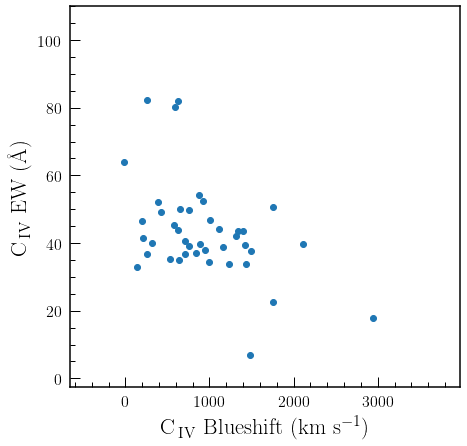

In [52]:
import richardsplot
fig = plt.figure(figsize=(7,7))
plt.scatter(blue[dec_range], ew[dec_range])
plt.xlabel("C\,$_\mathrm{IV}$ Blueshift (km s$^{-1}$)", fontsize=22.5)
plt.ylabel("C\,$_\mathrm{IV}$ EW (Å)", fontsize=22.5)
plt.xlim(-661.8514413771277, 3982.474755356233)
plt.ylim(-2.5,110)
plt.savefig("CIVtargets.pdf")

In [53]:
sample

col1                     Name        RA_1      Dec_1  \
24    2210  SDSSJ110643.99+494152.0  166.683321  49.697778   
38    2215  SDSSJ112934.85+481147.3  172.395245  48.196486   
46    2220  SDSSJ113653.01+482812.8  174.220914  48.470234   
56    3012  SDSSJ145844.83+492439.7  224.686796  49.411041   
57    2226  SDSSJ115729.71+495940.3  179.373821  49.994545   
58    2228  SDSSJ120554.84+494236.3  181.478533  49.710092   
68    8518  SDSSJ134844.91+491330.8  207.187146  49.225224   
609    363  SDSSJ082233.63+501712.3  125.640133  50.286753   
618    373  SDSSJ082846.01+490938.4  127.191729  49.160675   
981   3925  SDSSJ140952.13+490901.9  212.467213  49.150541   
1044   830  SDSSJ083649.56+484154.1  129.206525  48.698365   
1251  3935  SDSSJ141556.63+484429.4  213.985960  48.741509   
1395  1133  SDSSJ162732.88+482836.9  246.887006  48.476922   
1742  1502  SDSSJ090304.61+480336.5  135.769239  48.060148   
1744  1504  SDSSJ091003.60+501320.1  137.515027  50.222259   
1850  1614  SDSSJ155402.58+482951.0  238.510773  48.497523   
1851  1615  SDSSJ155237.65+481135.0  238.156895  48.193071   
1852  1616  SDSSJ154810.92+482528.1  237.045528  48.424483   
1856  1620  SDSSJ155330.43+501227.0  238.376833  50.207527   
2080  1824  SDSSJ103833.10+484152.3  159.637945  48.697875   
2083  1826  SDSSJ103426.81+502101.7  158.611742  50.350483   
2147  1927  SDSSJ091728.50+483203.1  139.368791  48.534199   
2504  2346  SDSSJ095047.48+480047.3  147.697835  48.013155   
2512  2353  SDSSJ095744.73+491823.3  149.436399  49.306498   
2525  2366  SDSSJ100823.41+494747.5  152.097558  49.796534   
2545  2445  SDSSJ141912.62+501025.4  214.802606  50.173730   
2610  2551  SDSSJ152957.18+495116.4  232.488269  49.854562   
2611  2552  SDSSJ152544.08+492551.2  231.433679  49.430906   
2615  2558  SDSSJ153745.03+481502.9  234.437634  48.250815   
2617  2560  SDSSJ153548.42+494818.7  233.951751  49.805214   
2766  2452  SDSSJ143154.32+494411.3  217.976340  49.736488   
2833  2454  SDSSJ144913.21+483715.7  222.305062  48.621051   
2868  2457  SDSSJ144549.72+493120.2  221.457186  49.522302   
3389  3498  SDSSJ125503.87+480952.9  193.766161  48.164696   
4558  4808  SDSSJ074729.63+492022.7  116.873492  49.339646   
5278  2223  SDSSJ114305.93+493542.7  175.774725  49.595208   
5723  2230  SDSSJ121420.28+484743.5  183.584513  48.795432   
7132  7468  SDSSJ161601.73+495634.4  244.007218  49.942899   
7529  7942  SDSSJ081602.19+492502.3  124.009164  49.417323   
7691  3469  SDSSJ121436.43+481426.5  183.651833  48.240721   
7834  8278  SDSSJ102111.01+491330.3  155.295909  49.225094   
8318  1501  SDSSJ085952.29+485046.7  134.967902  48.846330   
8345  8236  SDSSJ105636.40+493156.4  164.151671  49.532350   
8348  2836  SDSSJ123612.46+485442.8  189.051924  48.911902   
8363  2844  SDSSJ131028.13+482204.9  197.617234  48.368032   
8364  2845  SDSSJ131624.27+494522.9  199.101148  49.756367   
8368  2848  SDSSJ132442.70+483400.5  201.177932  48.566816   
8370  2850  SDSSJ131922.17+490723.2  199.842388  49.123138   
8373  2851  SDSSJ132250.60+500334.7  200.710834  50.059645   
8377  2854  SDSSJ133406.53+494235.7  203.527220  49.709936   
8381  2856  SDSSJ133420.86+485254.9  203.586922  48.881938   

               SDSS_NAME        RA_2      DEC_2  REDSHIFT  TARGET_FLAG_TARGET  \
24    110643.99+494152.0  166.683319  49.697777    1.6697                 2.0   
38    112934.85+481147.3  172.395248  48.196487    1.6810           1048579.0   
46    113653.01+482812.8  174.220917  48.470234    1.6549                 3.0   
56    145844.83+492439.7  224.686798  49.411041    1.7134           1048579.0   
57    115729.71+495940.3  179.373825  49.994545    1.7004                 2.0   
58    120554.84+494236.3  181.478531  49.710091    1.6660           1048578.0   
68    134844.91+491330.8  207.187149  49.225224    1.6518                 3.0   
609   082233.63+501712.3  125.640137  50.286755    1.7349           1048580.0   
618   082846.01+490938.4  127.191727  49.160675    1